首先安装 pytorch

In [3]:
!pip install torch torchvision

    100% |████████████████████████████████| 484.0MB 25kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5bea6000 @  0x7fb626a0a1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 6.6MB/s 
    100% |████████████████████████████████| 2.0MB 16.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


pytorch 首先是 tensor （n维数组）的计算库

In [75]:
import torch
x = torch.Tensor([1.0, 2.0, 3.0]) # vector (1d)
y = x ** x
y

tensor([  1.,   4.,  27.])

In [77]:
import torch
x = torch.Tensor([
    [1.0, 2.0, 3.0], 
    [1.0, 2.0, 3.0]
]) # matrix (2d)
y = x ** x
y

tensor([[  1.,   4.,  27.],
        [  1.,   4.,  27.]])

In [79]:
import torch
x = torch.Tensor([
    [[1.0], [2.0], [3.0]], 
    [[1.0], [2.0], [3.0]]
]) # tensor (more than 2d)
y = x ** x
y

tensor([[[  1.],
         [  4.],
         [ 27.]],

        [[  1.],
         [  4.],
         [ 27.]]])

pytorch 除了可以用来做 tensor 的运算之外，还可以对计算过程进行自动求导数

In [21]:
import torch
import matplotlib.pylab as plt

x = torch.Tensor([3.0])
x.requires_grad_(True)
y = x * x
y.backward(torch.ones(len(x)))
x.grad

tensor([ 6.])

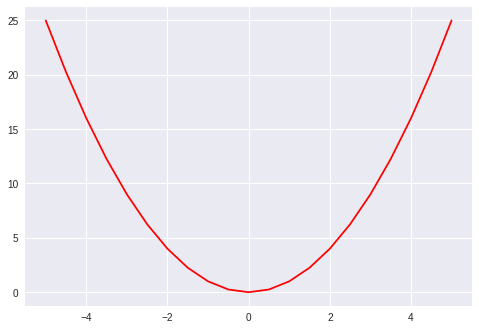

In [20]:
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(-5, 5, 21)
y = x * x
plt.plot(x, y, 'r')

In [51]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import torch

In [44]:
x = torch.Tensor([1., 2.])
x.requires_grad_(True)

tensor([ 1.,  2.])

In [43]:
y = torch.Tensor([2, 3])
y.requires_grad_(True)
y

tensor([ 2.,  3.])

In [45]:
z = x * y
z.backward(torch.Tensor([1, 1]))

In [34]:
y.backward(torch.Tensor([1,2]))

In [47]:
print(x.grad)
print(y.grad)

tensor([ 2.,  3.])
tensor([ 1.,  2.])


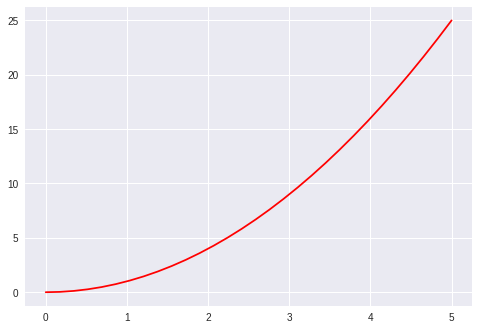

In [72]:
import numpy as np

x = np.linspace(0, 5, 30)
y = x * x
plt.plot(x, y, 'r')

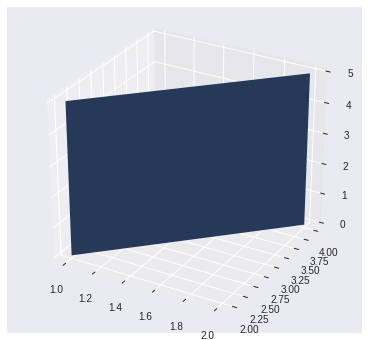

In [61]:
import numpy as np
from matplotlib import cm

X=np.array([1,2])
Y=np.array([2,4])
Z=np.array([[0,0],[4,4],[5,5]])
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# # surface_plot with color grading and color bar
# ax = fig.add_subplot(1, 2, 2, projection='3d')
# p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# cb = fig.colorbar(p, shrink=0.5)